In [2]:
import numpy as np
import os
import contextily as cx
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxr
import rich.table
from shapely.geometry import Polygon

from pystac_client import Client  # To access STAC catalogs

import planetary_computer  # To sign items from the MPC STAC catalog 

from IPython.display import Image  # To nicely display images

In [3]:
# Access MPC catalog
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

bbox = [-112.826843, 32.974108, -111.184387, 33.863574]
# search = catalog.search(collections=["io-biodiversity"], bbox=bbox)

In [4]:
# Define time range and bounding box
time_range = "2017-01-01/2020-01-01"
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# Search
search = catalog.search(collections=["io-biodiversity"], bbox=bbox, datetime=time_range)

In [5]:
# Get search items
items = search.item_collection()

In [6]:
# Preliminary image of search
Image(url=items[0].assets['rendered_preview'].href, width=500)

In [7]:
items
# Check the properties of these items to see which ones we want to isolate for 2017 and 2020
# We want to get items[0] (2020) and items[3] (2017)

In [9]:
bii_2020=items[0]
bii_2017=items[3]

In [10]:
# Obtain the bii data for 2017 and 2020
bii_2020=rioxr.open_rasterio(bii_2020.assets['data'].href)
bii_2017=rioxr.open_rasterio(bii_2017.assets['data'].href)

In [7]:
# Read in AZ census shapefile
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2020&layergroup=County+Subdivisions

In [8]:
fp = os.path.join('data','tl_2020_04_cousub.shp')
arizona = gpd.read_file(fp)

In [9]:
arizona.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,015,91964,02582914,0401591964,Lake Havasu City,Lake Havasu City CCD,22,Z5,G4040,None,None,None,S,7493863105,50863803,+34.7686221,-113.8749805,"POLYGON ((-114.48778 34.71722, -114.48622 34.7..."
1,04,007,91277,02582913,0400791277,Fort Apache,Fort Apache CCD,22,Z5,G4040,None,None,None,S,2134058292,4388167,+33.8847663,-110.3394452,"POLYGON ((-110.78327 34.16750, -110.78276 34.1..."
2,04,003,90306,01934923,0400390306,Bisbee,Bisbee CCD,22,Z5,G4040,None,None,None,S,1610943633,3494169,+31.4580397,-110.0783372,"POLYGON ((-110.46089 31.47376, -110.46089 31.4..."
3,04,003,90408,01934925,0400390408,Bowie,Bowie CCD,22,Z5,G4040,None,None,None,S,3556140749,1110460,+32.1699052,-109.3999964,"POLYGON ((-109.76866 32.30583, -109.76787 32.3..."
4,04,003,93825,01934992,0400393825,Willcox,Willcox CCD,22,Z5,G4040,None,None,None,S,1898081614,4959613,+32.1980984,-109.8877527,"POLYGON ((-110.15218 32.17203, -110.15213 32.1..."


From a preliminary exploration of the data, it seems that there is a lot of information held in the Arizona shapefile. It seems like the `NAME` column will be helpful for us to filter down to Phoenix.

In [10]:
# Filter to only be phoenix
phoenix = arizona[arizona.NAME == "Phoenix"]

In [11]:
phoenix.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
46,04,013,92601,01934968,0401392601,Phoenix,Phoenix CCD,22,Z5,G4040,None,None,None,S,2805901266,10048820,+33.5211331,-112.0284405,"POLYGON ((-112.47014 33.55996, -112.47011 33.5..."


<Axes: >

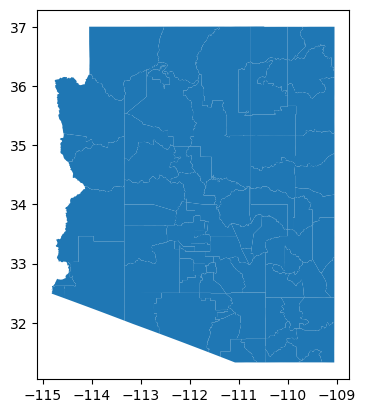

In [13]:
# Preliminary plot of Arizona
arizona.plot()

<Axes: >

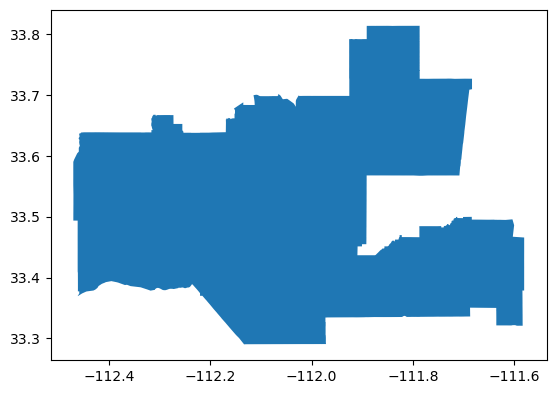

In [12]:
# Preliminary plot of Phoenix
phoenix.plot()

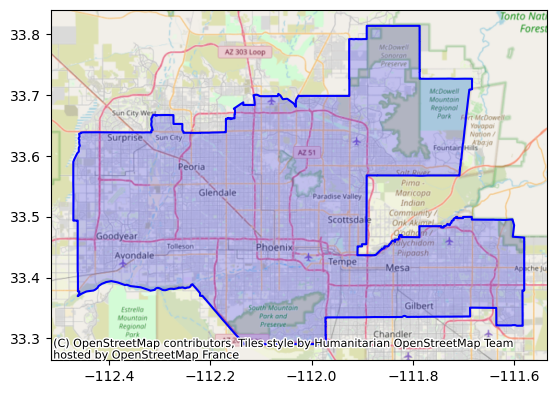

In [14]:
# Create map of Phoenix subdivision within the broader geographic context
fig, ax = plt.subplots()

phoenix.boundary.plot(ax = ax,
                     edgecolor = "blue")
phoenix.plot(ax = ax,
            color = "blue",
            alpha = 0.2)

cx.add_basemap(ax = ax,
               crs=phoenix.crs)



Calculate the percentage of area of the Phoenix subdivision with a BII of at least 0.75 in 2017 and do the same calculation for 2020.

In [ ]:
# For our calculations, let's make sure that the bii and the phoenix CRS's match 
